# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

### 数据清洗与整理

In [187]:
import numpy as np
import pandas as pd

In [189]:
T=pd.read_csv("titanic_train.csv").copy()
T.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


没有结构性问题，检查PassengerId是否存在重复变量

In [192]:
T.duplicated(subset=["PassengerId"]).sum()  

0

In [194]:
T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


存在缺失值，年龄大概率会影响幸存情况，用平均值进行填充，乘客id，姓名，船票号，船舱号，登船港口大概率不会影响幸存情况，将其删除
  
"Age" 存在缺失，填充平均值
"Cabin","Embarked","PassengerId ","Name","Ticket"删除列

In [197]:
T["Age"]=T["Age"].fillna(T["Age"].mean())

In [199]:
T=T.drop(["Cabin","Embarked","PassengerId","Name","Ticket"],axis=1)

"SibSp","Parch"可以合并为同乘人数

In [202]:
T["Togethernum"]=T["SibSp"]+T["Parch"]

In [204]:
T=T.drop(["SibSp","Parch"],axis=1)

"Survived","Pclass","Sex"应该为分类变量

In [207]:
T[["Survived","Pclass","Sex"]]=T[["Survived","Pclass","Sex"]].astype("category") 

In [209]:
T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    category
 1   Pclass       891 non-null    category
 2   Sex          891 non-null    category
 3   Age          891 non-null    float64 
 4   Fare         891 non-null    float64 
 5   Togethernum  891 non-null    int64   
dtypes: category(3), float64(2), int64(1)
memory usage: 24.0 KB


In [251]:
T["Survived"].value_counts()  

Survived
0    549
1    342
Name: count, dtype: int64

没有不一致问题

In [348]:
T_cleaned=T
T_cleaned.sample(10)

,Survived,Pclass,Sex,Age,Fare,Togethernum
7,0,3,male,2.000000,21.0750,4
619,0,2,male,26.000000,10.5000,0
35,0,1,male,42.000000,52.0000,1
460,1,1,male,48.000000,26.5500,0
61,1,1,female,38.000000,80.0000,0
650,0,3,male,29.699118,7.8958,0
64,0,1,male,29.699118,27.7208,0
67,0,3,male,19.000000,8.1583,0
719,0,3,male,33.000000,7.7750,0
246,0,3,female,25.000000,7.7750,0


### 数据可视化

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt  

初步探索自变量和因变量之间的相关性

<Axes: xlabel='Survived', ylabel='count'>

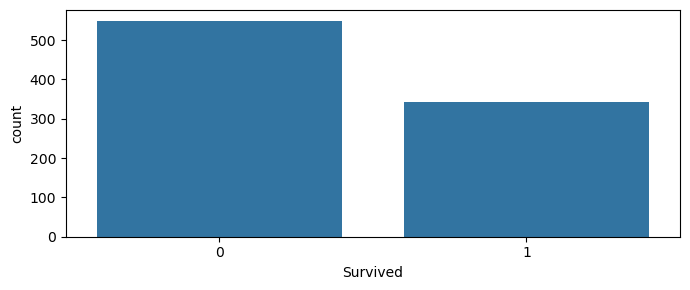

In [249]:
sns.countplot(T_cleaned, x='Survived')

三百多人存活，五百多人死亡

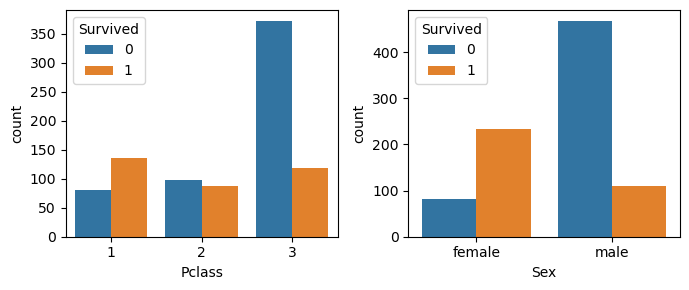

In [237]:
plt.rcParams["figure.figsize"] = [7.00, 3]         
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 2)   
sns.countplot(T_cleaned, x='Pclass', hue='Survived',ax=axes[0])
sns.countplot(T_cleaned, x='Sex', hue='Survived',ax=axes[1])
plt.show()

一等舱死亡率较低，三等舱死亡率较高，女性死亡率较低，男性死亡率较高

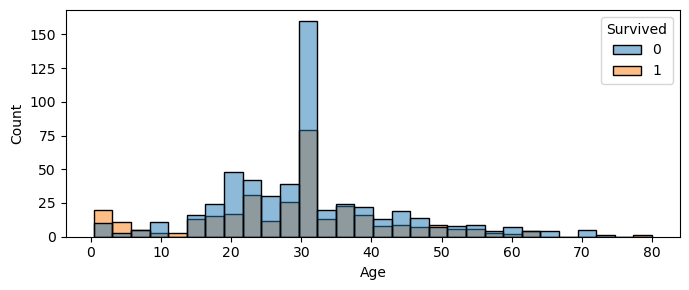

In [247]:
sns.histplot(T_cleaned, x='Age',hue='Survived')
plt.show()

婴儿死亡率较低，其他年龄段死亡率较高

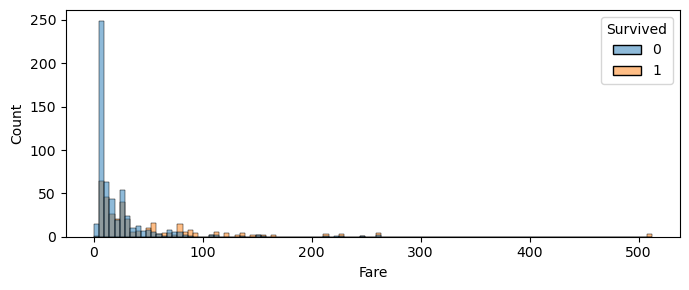

In [256]:
sns.histplot(T_cleaned, x='Fare',hue='Survived')
plt.show()

船票价格存在高价位的极端值，价格较高的死亡率较低

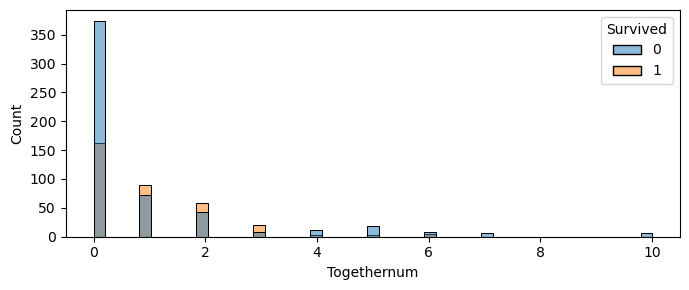

In [259]:
sns.histplot(T_cleaned, x='Togethernum',hue='Survived')
plt.show()

同乘人数为2人左右死亡率较低，更低或更高时死亡率较高

### 逻辑回归

In [341]:
import statsmodels.api as sm

把分类变量变为虚拟变量

In [350]:
T_cleaned=pd.get_dummies(T_cleaned,columns=["Pclass","Sex"],dtype=int,drop_first=True) 

In [352]:
T_cleaned.head()

,Survived,Age,Fare,Togethernum,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,1,0,1,1
1,1,38.0,71.2833,1,0,0,0
2,1,26.0,7.9250,0,0,1,0
3,1,35.0,53.1000,1,0,0,0
4,0,35.0,8.0500,0,0,1,1


In [354]:
y=T_cleaned["Survived"]                                        #从列表中提取自变量与因变量
X=T_cleaned.drop(["Survived"],axis=1) 

检查自变量之间的相关系数是否过大>0.8

In [357]:
X.corr( ).abs( )>0.8  

,Age,Fare,Togethernum,Pclass_2,Pclass_3,Sex_male
Age,True,False,False,False,False,False
Fare,False,True,False,False,False,False
Togethernum,False,False,True,False,False,False
Pclass_2,False,False,False,True,False,False
Pclass_3,False,False,False,False,True,False
Sex_male,False,False,False,False,False,True


给自变量添加截距

In [360]:
X=sm.add_constant(X) 

In [362]:
X.head()

,const,Age,Fare,Togethernum,Pclass_2,Pclass_3,Sex_male
0,1.0,22.0,7.2500,1,0,1,1
1,1.0,38.0,71.2833,1,0,0,0
2,1.0,26.0,7.9250,0,0,1,0
3,1.0,35.0,53.1000,1,0,0,0
4,1.0,35.0,8.0500,0,0,1,1


In [364]:
model=sm.Logit(y,X).fit( ) 
model.summary( ) 

Optimization terminated successfully.
         Current function value: 0.443547
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Fri, 28 Mar 2025   Pseudo R-squ.:                  0.3339
Time:                        21:44:45   Log-Likelihood:                -395.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.786e-82
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.8097      0.445      8.568      0.000       2.938       4.681
Age            -0.0388      0.008     -4.963      0.000      -0.054      -0.023
Fare            0.0032      0.002      1.311      0.190      -0.002       0.008
Togethernum    -0.2430      0.068     -3.594      0.000      -0.376      -0.110
Pclass_2       -1.0003      0.293     -3.416      0.001      -1.574      -0.426
Pclass_3       -2.1324      0.289     -7.373      0.000      -2.699      -1.566
Sex_male       -2.7759      0.199    -13.980      0.000      -3.165      -2.387
===============================================================================
"""

当显著性为0.05时，从p值可见Fare对模型没有显著影响，将其移除模型后再次拟合

In [367]:
X=X.drop("Fare",axis=1)

In [369]:
X.head()

,const,Age,Togethernum,Pclass_2,Pclass_3,Sex_male
0,1.0,22.0,1,0,1,1
1,1.0,38.0,1,0,0,0
2,1.0,26.0,0,0,1,0
3,1.0,35.0,1,0,0,0
4,1.0,35.0,0,0,1,1


In [371]:
model=sm.Logit(y,X).fit( ) 
model.summary( ) 

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Fri, 28 Mar 2025   Pseudo R-squ.:                  0.3323
Time:                        21:45:07   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.0620      0.404     10.049      0.000       3.270       4.854
Age            -0.0395      0.008     -5.065      0.000      -0.055      -0.024
Togethernum    -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2       -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3       -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_male       -2.7854      0.198    -14.069      0.000      -3.173      -2.397
===============================================================================
"""

In [311]:
np.exp(-0.0395)

0.9612699539905982

年龄每增加1单位，生存的几率是原来的0.96倍

In [313]:
np.exp(-0.2186)

0.803643111115195

同行人每增加1单位，生存的几率是原来的0.8倍

In [317]:
np.exp(-2.3458)

0.09577055503172162

位于三等舱的乘客，生存的几率是非三等舱的0.095倍

### 预测

In [327]:
T_predict=pd.read_csv("titanic_test.csv").copy()
T_predict.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [329]:
T_predict.duplicated(subset=["PassengerId"]).sum()  

0

In [331]:
T_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [333]:
T_predict["Age"]=T_predict["Age"].fillna(T_predict["Age"].mean())

In [373]:
T_predict=T_predict.drop(["Cabin","Embarked","PassengerId","Name","Ticket","Fare"],axis=1)

In [377]:
T_predict["Togethernum"]=T_predict["SibSp"]+T_predict["Parch"]

In [381]:
T_predict=T_predict.drop(["SibSp","Parch"],axis=1)

In [391]:
T_predict.head()

,Pclass,Sex,Age,Togethernum
0,3,male,34.5,0
1,3,female,47.0,1
2,2,male,62.0,0
3,3,male,27.0,0
4,3,female,22.0,2


In [385]:
T_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    object 
 2   Age          418 non-null    float64
 3   Togethernum  418 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 13.2+ KB


In [389]:
T_predict[["Pclass","Sex"]]=T_predict[["Pclass","Sex"]].astype("category")

In [393]:
T_predict["Pclass"]=pd.Categorical(T_predict["Pclass"],categories=["1","2","3"])
T_predict["Sex"]=pd.Categorical(T_predict["Sex"],categories=["female","male"])

In [395]:
T_predict=pd.get_dummies(T_predict,columns=["Pclass","Sex"],dtype=int,drop_first=True) 

In [399]:
T_predict=sm.add_constant(T_predict) 

In [401]:
T_predict.head()

,const,Age,Togethernum,Pclass_2,Pclass_3,Sex_male
0,1.0,34.5,0,0,0,1
1,1.0,47.0,1,0,0,0
2,1.0,62.0,0,0,0,1
3,1.0,27.0,0,0,0,1
4,1.0,22.0,2,0,0,0


In [405]:
survive=model.predict(T_predict) 
survive

0      0.478514
1      0.879434
2      0.236473
3      0.552361
4      0.940242
         ...   
413    0.520230
414    0.925647
415    0.439306
416    0.520230
417    0.411858
Length: 418, dtype: float64

In [409]:
np.sum(survive>0.5)

316

设置阈值为0.5，则认为预测此417人中有316有概率幸存